# RBF Networks and Prototypical Learning

## Introduction

- We have learned how neural networks transform data into new representation to solve non-linear problems.
- We will not look at non-linear classification from the perspective of function approximation.
- Key idea:
    - Transform data in terms of a preselected class of interpolation functions.
- We will also see how RBF networks relate to the field of prototypical learning.

## Function approximation

- Recall the XOR example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR problem: four blobs at (0,0), (0,1), (1,0), (1,1)
np.random.seed(42)
n_samples = 50
std = 0.15

centers = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
labels = np.array([0, 1, 1, 0])  # XOR labels

X = []
y = []
for center, label in zip(centers, labels):
    X.append(center + std * np.random.randn(n_samples, 2))
    y.append(np.full(n_samples, label))
X = np.vstack(X)
y = np.concatenate(y)


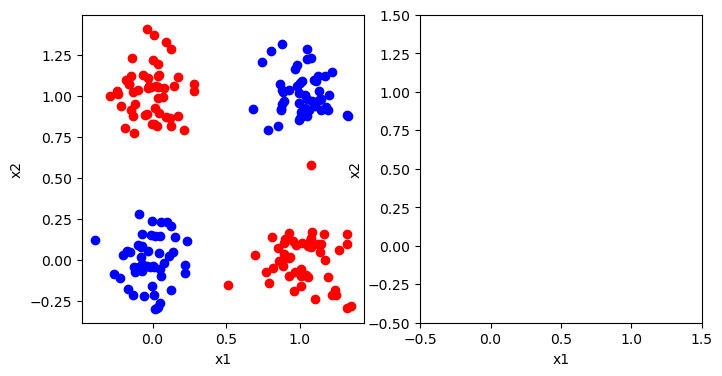

In [2]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.subplot(122)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### General idea

- Let (non-linear) $f_i: \mathbb{R}^d \rightarrow \mathbb{R}, i=1,\cdots,k$
- Look at $\mathbf{x} \in \mathbb{R}^d$. (Usually $k>l$)
- Draw example:

### Network

- The function approximation setup described above can be thought of as a network:

## Radial basis function (RBF) networks

- General idea: $$ f(\|\mathbf{x} - \mathbf{c}_i\|)$$
- RBF network: $$ f(\mathbf{x})= \exp(-\frac{1}{2\sigma_i^2}(\|\mathbf{x} - \mathbf{c}_i\|))$$
- Activation at node $f_i$ given by distance to $\mathbf{c}_i$.

### Estimating the weights

- Any linear method will do!
- Let $\mathbf{y}$ be the desired outputs. Construct matrix $\mathbf{G}$:
- $$ G = \begin{bmatrix} \phi(x_1, c_1) & \cdots & \phi(x_1, c_k) \\ \vdots & & \vdots \\ \phi(x_N, c_1) & \cdots & \phi(x_N, c_k) \end{bmatrix}_{N \times k} $$
- So: 
- $$ \mathbf{g} = G \mathbf{w} = \begin{bmatrix} g(x_1) \\ \vdots \\ g(x_N) \end{bmatrix} $$

### Estimating the weights

- Choose $\mathbf{w}$ such that $J = \|\mathbf{y} - G\mathbf{w}\|^2$ is minimized.
- $$ \frac{\partial J}{\partial \mathbf{w}} = 0 \implies \boxed{\mathbf{w} = (G^\top G)^{-1} G^\top \mathbf{y}} $$


### How to choose the centers?

- **Fixed centres:** Centres selected randomly from the training set.  
   - Simple, but not optimum!
- **Training of the centres:**  Let $\sigma_i^2$, $\mathbf{c}_i$, $w_i$, $i=1,\ldots,k$, be free parameters learned from the training set.

   $$
   \frac{\partial J}{\partial \mathbf{c}_i} = 0 \implies \mathbf{c}_i^{(\text{new})} = \mathbf{c}_i^{(\text{old})} + \mu \frac{\partial J}{\partial \mathbf{c}_i}
   $$
- Choose centres according to how the data are distributed in space. Draw ->
   - More about this later.

## Prototypical learning

- Consider the following example

<p float="left">
    <img src="media/uncertaintyex.jpg" width="400" />
</p>

### Prototypical learning

- Define / learn prototypes and classifiy new samples based on similarity.
- Prototypes can be defined in input space or in latent space!

<p float="left">
    <img src="media/protovae.png" width="700" />
</p>

### Prototypical learning

- Using prototypes can make it easier to understand the behaviour of your model.
- Prototypes represent "typical" examples in the data.
- Example from Kingma and Welling, 2016.

<p float="left">
    <img src="media/vae.png" width="700" />
</p>

### Prototypical learning

- Using prototypes can make it easier to understand the behaviour of your model.
- Prototypes represent "typical" examples in the data.

<p float="left">
    <img src="media/archetype.png" width="400" />
</p>

### Challenges with prototypical learning

- Curse of dimensionality.
    - Need many prototypes in high dimensional space. Can be computationally expensive.
- Optimization can be slow, and can be memory intensive.

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.


## Problem 4.20 from book

Use an RBF network to approximate the function plotted below. Select the centers from a regular grid between 0 and 1. Repeat the experiments with different numbers of Gaussian functions and bandwidths for the Gaussian function. Estimate the unkown weights using the least squares method.

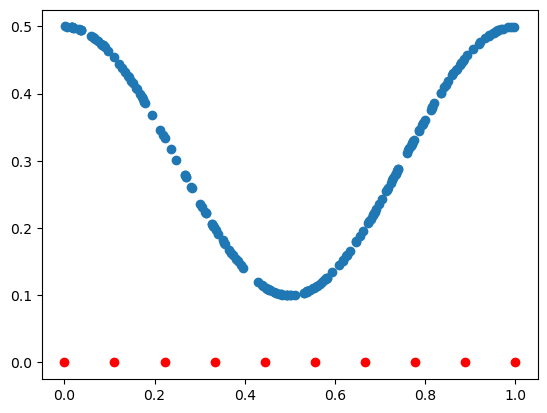

In [1]:

import numpy as np
import matplotlib.pyplot as plt

N_tr = 200
c = np.linspace(0, 1, 10).reshape(10, 1)

def cos_func(x):
    return 0.3+0.2*np.cos(2*np.pi*x)


x_tr = np.sort(np.random.uniform(size=N_tr))
y_tr = cos_func(x_tr)

plt.figure(1)
plt.scatter(x_tr, y_tr)
plt.scatter(c, np.zeros(10), color='red')
plt.show()